# Hands-on-Activity #4
## Instructions:
Put all files, source codes and your results in jupyter notebook file and submit it through eLearn. Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. 


The purpose of this hands-on-activity is to diagnose whether or not a patient is diabetic, on the basis of certain diagnostic measures in the given pima-indians-diabetes.csv dataset.
The coulums in this set are:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

The coulum 9 shows whether the patient is diabetic or not. 
9. Class variable (0 or 1)

## Question:
Apply decision tree approach to the given dataset and figure out which 3 features are the most important ones in the classification of the diabetes.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [30]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Your Code:

checking missing values in data

In [31]:
data.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [32]:
X, y = data[data.columns.difference(['label'])], data.label

X.shape, y.shape

((768, 8), (768,))

split features and labels in train test sets (80-20 split)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [34]:
tree_classifier = DecisionTreeClassifier(random_state=0)

tree_classifier.fit(X_train, y_train)

train_score = accuracy_score(tree_classifier.predict(X_train), y_train)

y_pred = tree_classifier.predict(X_test)
test_score = accuracy_score(y_pred, y_test)

print('training score', train_score)
print('test score', test_score)

training score 1.0
test score 0.7727272727272727


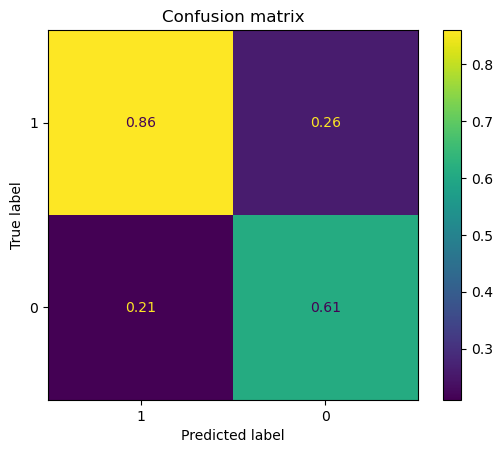

In [35]:
confusion = confusion_matrix(y_pred, y_test) #compute confusion matrix

ConfusionMatrixDisplay(confusion/confusion.sum(axis=1), display_labels=y.unique()).plot();
plt.title('Confusion matrix');

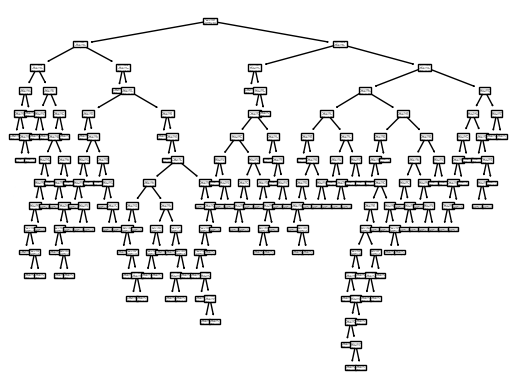

In [36]:
plot_tree(tree_classifier);

In [41]:
col_idx = np.argsort(tree_classifier.feature_importances_)

print("Top 3 features are:", X.columns[col_idx[-3:]].values)

Top 3 features are: ['pedigree' 'bmi' 'glucose']


## Your Answer:

Based on the fitted DecisionTreeClassifier the top 3 columns are: 
- pedigree
- bmi 
- glucose

And based on the training and test scores, there is some overfitting.